In [108]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [109]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [115]:
df = pd.read_csv('train.csv')

In [3]:
df = df.drop('Id', axis=1)
df_reduced = df.drop(['BldgType','RoofMatl','ExterCond','Functional','3SsnPorch','ScreenPorch','MoSold',
                      'Street','Utilities','PoolQC','LotFrontage','GarageYrBlt'], axis=1)

# Separate features and response
X, y = df_reduced.iloc[:,:-1], df_reduced.iloc[:,-1]

# log transformation
y = np.log(y)

In [117]:
pd.DataFrame({'dtype':df.dtypes, \
              'missing_perc':df.count()}).sort_values(by='missing_perc',ascending = True)

,dtype,missing_perc
PoolQC,object,7
MiscFeature,object,54
Alley,object,91
Fence,object,281
FireplaceQu,object,770
LotFrontage,float64,1201
GarageYrBlt,float64,1379
GarageType,object,1379
GarageFinish,object,1379
GarageQual,object,1379


In [118]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
X['MSSubClass'] = X['MSSubClass'].astype('category')
# X.head()
# y.head()

In [5]:
# dummify categorical data
for col in X.select_dtypes(exclude=[np.number]).columns:
    dummy = pd.get_dummies(X[col], prefix=col, prefix_sep='__', dummy_na=True)
    if col + '__nan' in dummy.columns:
        dummy.drop(col + '__nan', axis=1, inplace=True)
    else:
        dummy = dummy[:,:-1]    
    X = pd.concat([X,dummy], axis=1)
    X.drop(col, axis=1, inplace=True)

In [6]:
X.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,YrSold,MSSubClass__20.0,MSSubClass__30.0,MSSubClass__40.0,MSSubClass__45.0,MSSubClass__50.0,MSSubClass__60.0,MSSubClass__70.0,MSSubClass__75.0,MSSubClass__80.0,MSSubClass__85.0,MSSubClass__90.0,MSSubClass__120.0,MSSubClass__160.0,MSSubClass__180.0,MSSubClass__190.0,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__Grvl,Alley__Pave,LotShape__IR1,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__Bnk,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Gtl,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,...,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,BsmtFinType1__ALQ,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,BsmtFinType2__ALQ,BsmtFinType2__BLQ,BsmtFinType2__GLQ,BsmtFinType2__LwQ,BsmtFinType2__Rec,BsmtFinType2__Unf,Heating__Floor,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,HeatingQC__Ex,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,CentralAir__N,CentralAir__Y,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,FireplaceQu__Ex,FireplaceQu__Fa,FireplaceQu__Gd,FireplaceQu__Po,FireplaceQu__TA,GarageType__2Types,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__Po,GarageQual__TA,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__Po,GarageCond__TA,PavedDrive__N,PavedDrive__P,PavedDrive__Y,Fence__GdPrv,Fence__GdWo,Fence__MnPrv,Fence__MnWw,MiscFeature__Gar2,MiscFeature__Othr,MiscFeature__Shed,MiscFeature__TenC,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,

In [ ]:
# X.to_csv('train_dummfied.csv', index=False)

In [7]:
 X['MasVnrArea'].fillna(0, inplace=True)

# Missing Values

In [8]:
(X.select_dtypes(include = [np.number]).count()/X.shape[0]).sort_values()

LotArea                   1.0
Foundation__Stone         1.0
Foundation__Wood          1.0
BsmtQual__Ex              1.0
BsmtQual__Fa              1.0
BsmtQual__Gd              1.0
BsmtQual__TA              1.0
BsmtCond__Fa              1.0
BsmtCond__Gd              1.0
BsmtCond__Po              1.0
BsmtCond__TA              1.0
BsmtExposure__Av          1.0
BsmtExposure__Gd          1.0
BsmtExposure__Mn          1.0
BsmtExposure__No          1.0
BsmtFinType1__ALQ         1.0
BsmtFinType1__BLQ         1.0
BsmtFinType1__GLQ         1.0
BsmtFinType1__LwQ         1.0
BsmtFinType1__Rec         1.0
BsmtFinType1__Unf         1.0
BsmtFinType2__ALQ         1.0
BsmtFinType2__BLQ         1.0
BsmtFinType2__GLQ         1.0
BsmtFinType2__LwQ         1.0
BsmtFinType2__Rec         1.0
BsmtFinType2__Unf         1.0
Heating__Floor            1.0
Heating__GasA             1.0
Heating__GasW             1.0
Foundation__Slab          1.0
Heating__Grav             1.0
Foundation__PConc         1.0
Foundation

In [ ]:
(df.count()/df.shape[0]).sort_values()

In [ ]:
df.describe()

In [ ]:
df_number = df.select_dtypes(include=[np.number])
len(df_number.columns)

In [ ]:
plt.figure(figsize=(20,30))
for idx, col in zip(range(1, len(df_number.columns) + 1), df_number.columns.sort_values()):
    plt.subplot(10,4,idx)
    plt.hist(df_number[col].dropna(), bins=30)
    plt.title(col + ': ' + str(len(df_number[col].dropna())/len(df_number[col]))) # % availability
    plt.grid()
    plt.tight_layout()

plt.show()

# Modeling

## Multilinear Regression with Cross Validation

In [ ]:
from sklearn import linear_model

In [ ]:
X_reduced = X.loc[:,['OverallQual','1stFlrSF','GrLivArea','MSZoning_C (all)',
                     'MSZoning_FV','MSZoning_RH','MSZoning_RM','YearBuilt']]

In [ ]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_reduced, y, cv=5, scoring='neg_mean_squared_error')
scores.mean()

## Ridge Regression with Cross Validation

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

/home/yongguang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


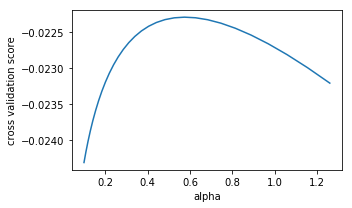

In [89]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-1, 0.1, 30)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=True), X_train_reduced, y_train, 
                          cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [85]:
best_alpha = alphas[np.argmax(scores)] # 0.5736152510448681
best_alpha

0.5736152510448681

In [86]:
# train model with best alpha
rm = linear_model.Ridge(alpha = best_alpha, normalize=True)
rm.fit(X_train_reduced, y_train)

Ridge(alpha=0.5736152510448681, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [87]:
rmpred = rm.predict(X_test_reduced)
np.sqrt(np.mean(np.square(rmpred - y_test.values)))

0.12741457355052208

In [88]:
np.abs(pd.Series(rm.coef_, index=X_train_reduced.columns)).sort_values(ascending=False)

Condition2__PosN          3.290475e-01
MSZoning__C (all)         2.627968e-01
Exterior1st__BrkComm      1.703944e-01
Condition2__PosA          1.639242e-01
GarageQual__Ex            1.489188e-01
Heating__Floor            1.462371e-01
Neighborhood__MeadowV     1.293720e-01
MiscFeature__Othr         1.145316e-01
RoofStyle__Shed           9.675796e-02
Neighborhood__NoRidge     9.046308e-02
Neighborhood__StoneBr     8.847724e-02
SaleType__Con             8.756489e-02
Neighborhood__Crawfor     8.286448e-02
LotShape__IR3             8.254124e-02
BsmtCond__Po              8.164640e-02
Electrical__Mix           8.164640e-02
MSSubClass__180.0         7.592047e-02
Exterior1st__Stone        7.557251e-02
FireplaceQu__Ex           7.490383e-02
SaleType__ConLD           6.873997e-02
MSSubClass__30.0          6.770146e-02
Neighborhood__NridgHt     6.589969e-02
KitchenQual__Ex           6.529084e-02
GarageQual__Gd            6.301588e-02
Condition2__Artery        6.274581e-02
Neighborhood__Edwards    

Automatically created module for IPython interactive environment


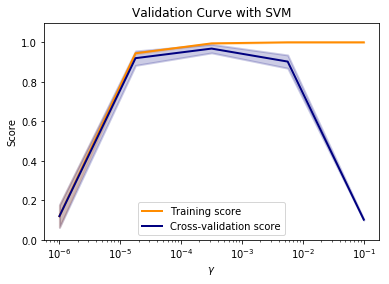

In [91]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


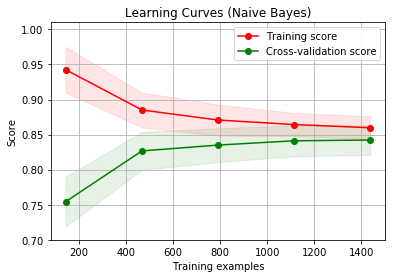

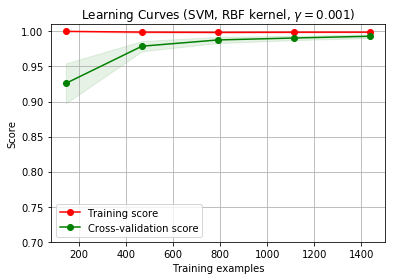

In [90]:
# plot learning curve
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()